## **Project Name** - Sales Prediction Using Python

##### Project Type - Prediction 
##### Name - Aryan Patel 
##### Task - 5
##### Github Respo - https://github.com/aryanap11/OIBSIP
#### Project Description - 

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

In [416]:
import numpy as np
import pandas as pd

##  **1) READ DATASET**

In [417]:
df= pd.read_csv("Advertising.csv")

In [418]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [419]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


##  **2) DATASET ANALYSIS**

In [420]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [421]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [422]:
# Get size of dataset
df.size

1000

In [423]:
# Get (rows,columns)
df.shape

(200, 5)

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [425]:
#Get number of duplicate rows
df.duplicated().sum()

0

In [426]:
# Get number of null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [427]:
#Get statistical summary of dataset(numeric values)
df.describe().round(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.022
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


### Conclusion about the dataset 


* The dataset contains advertising spending across TV, Radio, Newspaper and the corresponding sales. 
* There are 200 rows and 5 columns in the data.
* Column names : 'Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'
* No duplicate rows present in dataset.
* No Null values present in dataset.

## **3) DATA TRANSFORMATION**

In [428]:
# Removing the 'Unnamed: 0' column as it's of no use
df=df.drop(['Unnamed: 0'], axis=1)

In [429]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## **4) DATA VISUALIZATION**

In [430]:
import seaborn as sns
import matplotlib.pyplot as plt

####  3.1 - Boxplot

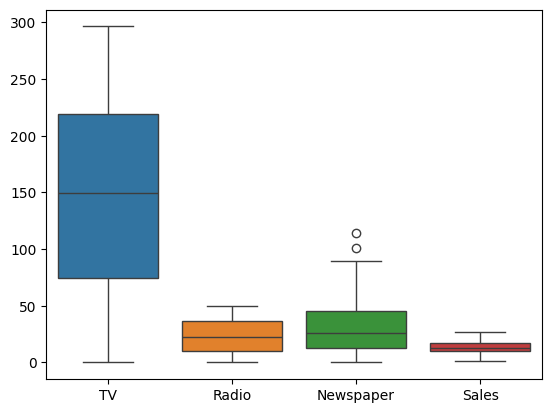

In [431]:
# Boxplot to see outliers
sns.boxplot(df)
plt.show()

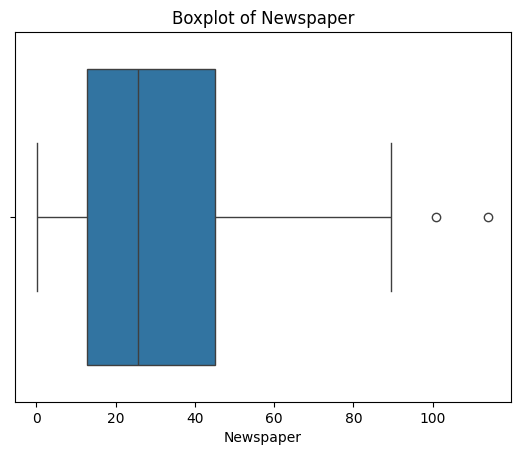

In [432]:
sns.boxplot(x=df['Newspaper'])
plt.title('Boxplot of Newspaper')
plt.show()


**Findings:** As we can see there are outliers in 'Newspaper' so we'll remove them

In [433]:
#Removing outliers
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers
outliers = df[(df['Newspaper'] < lower_bound) | (df['Newspaper'] > upper_bound)]
print(outliers)

df_clean = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]

        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


In [434]:
df_clean

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [435]:
df_clean.shape

(198, 4)

In [436]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


#### 3.2 - Correlation Heatmap

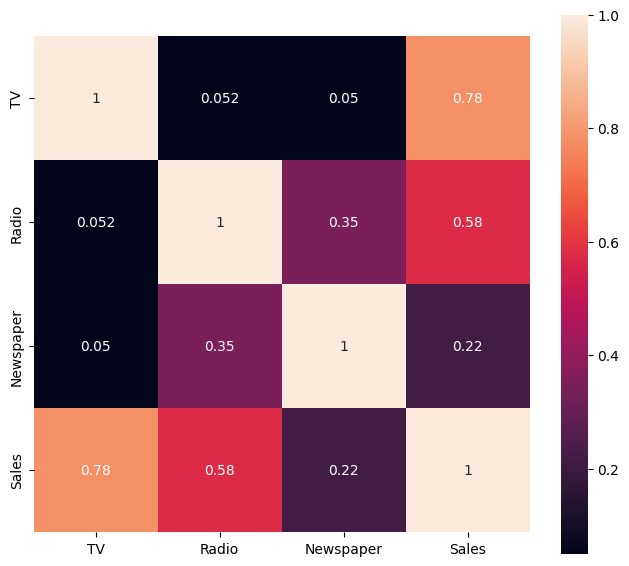

In [437]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables

corrmat = df_clean.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corrmat,annot=True , square=True)
plt.show()

#### Insights/conclusion form corelation chart

* TV and Radio have stronger correlations with Sales (0.779 , 0.577) compared to Newspaper (0.220).

* so for the training of model TV and Radio will be important features as they have significant impact on Sales.


#### 3.3 - Relationship between each independent variable and the dependent variable

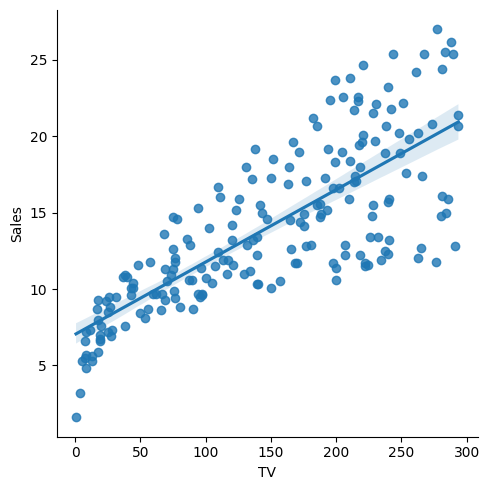

In [438]:
# tv vs sales
sns.lmplot(x='TV', y='Sales', data=df_clean)

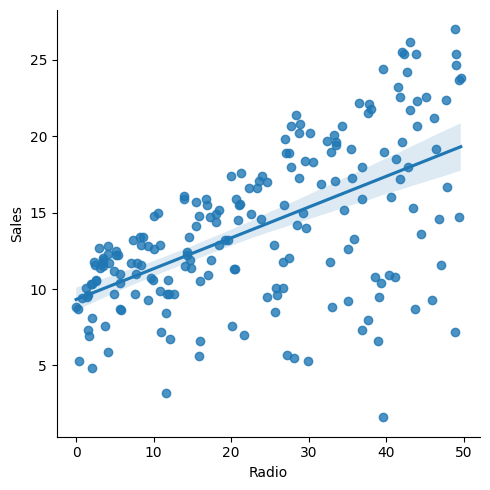

In [439]:
# radio vs sales 
sns.lmplot(x='Radio', y='Sales', data=df_clean)

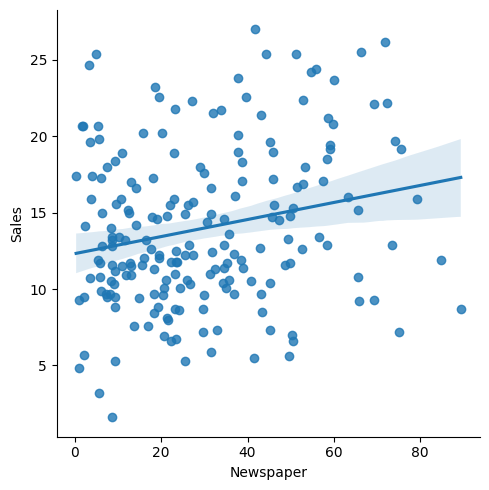

In [440]:
# newspaper vs sales 
sns.lmplot(x='Newspaper',y= 'Sales', data=df_clean)

 ## **4) ML MODEL TRAINING**

In [441]:
# with tv radio and newspaper
x = df_clean[['TV','Radio','Newspaper']]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [442]:
# Target
y=df_clean['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### Splitting The Data Into Test And Train Data

In [443]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test  = train_test_split(x, y, test_size=0.2, random_state=0)

In [444]:
import pandas as pd
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

## Model-1 Linear Regression

In [445]:
# Linear Regression
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train , y_train )

y_pred  = LR .predict(X_test )
y_pred

array([14.01074388,  7.32660883, 16.91029923, 12.10494494, 10.32680801,
       15.800589  , 12.86917345, 14.46182171, 10.88622651, 16.12070585,
       22.89188978,  4.44772138, 14.47452338, 15.16779294, 13.08219004,
       11.93756336,  7.38163825, 11.34017618,  9.97074394, 17.25257133,
       20.92597453,  9.48506413,  8.89608111, 12.37384205,  9.35819552,
       16.12716079, 12.20096627, 20.59655504, 21.36951517, 15.07208869,
       23.2153892 , 20.87809592,  9.72208672, 24.06696712, 16.36688684,
        7.97869287, 21.91262979, 13.29393385, 11.82322424,  9.07954633])

In [446]:
print('intercept: ',LR.intercept_)
print('coefficients: ',LR.coef_)

intercept:  2.7811975517715837
coefficients:  [0.0448192  0.18851633 0.00639467]


In [447]:
# actual and predicted valus
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,14.6,14.010744
1,8.4,7.326609
2,18.0,16.910299
3,11.7,12.104945
4,8.8,10.326808
5,16.0,15.800589
6,7.2,12.869173
7,15.5,14.461822
8,9.2,10.886227
9,16.6,16.120706


In [448]:
# Model Evaluation 
mae  = mean_absolute_error(y_test , y_pred )
mse  = mean_squared_error(y_test , y_pred )
rmse  = mse  ** 0.5
r2  = r2_score(y_test , y_pred )

evaluation= [mae,mse,rmse,r2]
score = pd.DataFrame(index = ['MAE', 'MSE', 'RMSE',  'R2'])
score['LR'] = evaluation

Text(0.5, 1.0, 'Actual and Predicted Sales')

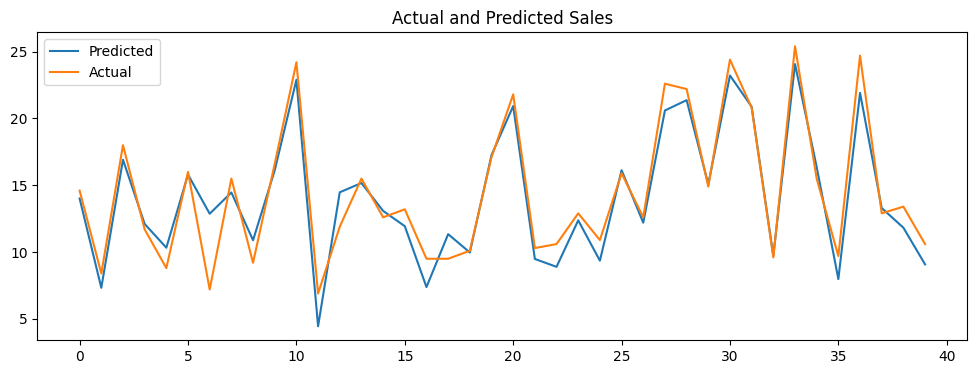

In [449]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales', fontsize=12)

In [450]:
score

,LR
MAE,1.177153
MSE,2.432077
RMSE,1.559512
R2,0.909895


## Model-2 Decision Tree Regressor

In [451]:
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor

DTR  = DecisionTreeRegressor()
DTR.fit(X_train , y_train )

y_pred  = DTR.predict(X_test )
y_pred

array([16.6,  9.7, 15.2, 12.8,  8. , 15.9,  6.6, 15. ,  8.5, 16.6, 25.4,
        7.2, 12.3, 15.6, 14.7, 11.9,  9.4,  8. , 10.4, 18.5, 22.1, 10.5,
        9.7, 11.9, 11.3, 15.6, 14.4, 21.7, 21.5, 16.6, 22.1, 19.7, 10.1,
       26.2, 14.7,  9.7, 23.8, 14.1, 12.2,  9.7])

In [452]:
# actual and predicted valus
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,14.6,16.6
1,8.4,9.7
2,18.0,15.2
3,11.7,12.8
4,8.8,8.0
5,16.0,15.9
6,7.2,6.6
7,15.5,15.0
8,9.2,8.5
9,16.6,16.6


In [453]:
# Model Evaluation 
mae  = mean_absolute_error(y_test , y_pred )
mse  = mean_squared_error(y_test , y_pred )
rmse  = mse  ** 0.5
r2  = r2_score(y_test , y_pred )

evaluation= [mae,mse,rmse,r2]
score['DTR'] = evaluation

Text(0.5, 1.0, 'Actual and Predicted Sales (DecisionTreeRegressor)')

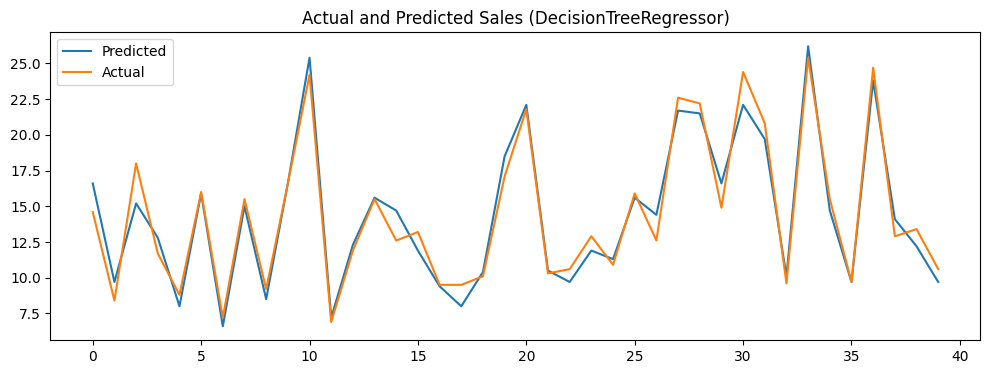

In [454]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales (DecisionTreeRegressor)', fontsize=12)

In [455]:
score

,LR,DTR
MAE,1.177153,0.912500
MSE,2.432077,1.268750
RMSE,1.559512,1.126388
R2,0.909895,0.952994


## Model-3 Random Forest Regressor

In [456]:
# Train the model
from sklearn.ensemble import RandomForestRegressor

RFR  = RandomForestRegressor()
RFR.fit(X_train , y_train )

y_pred  = RFR.predict(X_test )
y_pred

array([15.717,  9.245, 16.878, 12.434,  8.214, 15.083,  6.864, 15.553,
        8.387, 17.   , 25.151,  7.244, 12.09 , 15.533, 13.028, 12.636,
        9.367,  7.687, 10.507, 17.539, 22.123, 10.461, 10.051, 12.879,
       11.158, 15.72 , 13.782, 22.364, 21.22 , 16.329, 22.926, 20.47 ,
       10.332, 25.236, 15.142,  9.369, 23.235, 13.931, 12.534, 10.017])

In [457]:
# actual and predicted valus
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,14.6,15.717
1,8.4,9.245
2,18.0,16.878
3,11.7,12.434
4,8.8,8.214
5,16.0,15.083
6,7.2,6.864
7,15.5,15.553
8,9.2,8.387
9,16.6,17.000


In [458]:
# Model Evaluation 
mae  = mean_absolute_error(y_test , y_pred )
mse  = mean_squared_error(y_test , y_pred )
rmse  = mse  ** 0.5
r2  = r2_score(y_test , y_pred )

evaluation= [mae,mse,rmse,r2]
score['RFR'] = evaluation

Text(0.5, 1.0, 'Actual and Predicted Sales (RandomForestRegressor)')

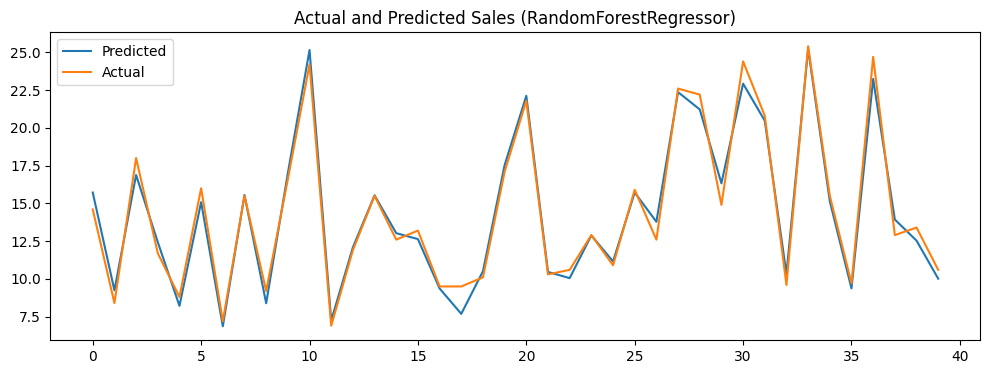

In [459]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales (RandomForestRegressor)', fontsize=12)

In [460]:
score

,LR,DTR,RFR
MAE,1.177153,0.912500,0.621950
MSE,2.432077,1.268750,0.586798
RMSE,1.559512,1.126388,0.766027
R2,0.909895,0.952994,0.978260


## Model-4 Support Vector Regressor

In [461]:
# Train the model
from sklearn.svm import SVR

SVR  = SVR()
SVR.fit(X_train , y_train )

y_pred  = SVR.predict(X_test )
y_pred

array([14.63187601,  8.65150457, 16.24395389, 13.89024124,  8.73308591,
       15.35185943,  9.1943873 , 15.32738951,  9.15009018, 16.2105523 ,
       19.82269093,  7.13274544, 15.90651796, 15.74635929, 12.35141978,
       12.79097969,  9.90280999,  9.03859644,  9.37691197, 17.67052203,
       18.98369233, 11.56122342, 10.77042121, 13.66024786, 10.23539531,
       16.09529915, 13.57038657, 19.14750132, 19.35953536, 15.85319656,
       19.175568  , 18.44067661,  9.21430003, 19.13072139, 16.48080036,
       10.15319025, 19.24689969, 15.1597682 , 12.98456411, 10.65746918])

In [462]:
# actual and predicted valus
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,14.6,14.631876
1,8.4,8.651505
2,18.0,16.243954
3,11.7,13.890241
4,8.8,8.733086
5,16.0,15.351859
6,7.2,9.194387
7,15.5,15.327390
8,9.2,9.150090
9,16.6,16.210552


In [463]:
# Model Evaluation 
mae  = mean_absolute_error(y_test , y_pred )
mse  = mean_squared_error(y_test , y_pred )
rmse  = mse  ** 0.5
r2  = r2_score(y_test , y_pred )

evaluation= [mae,mse,rmse,r2]
score['SVR'] = evaluation

Text(0.5, 1.0, 'Actual and Predicted Sales (SVR)')

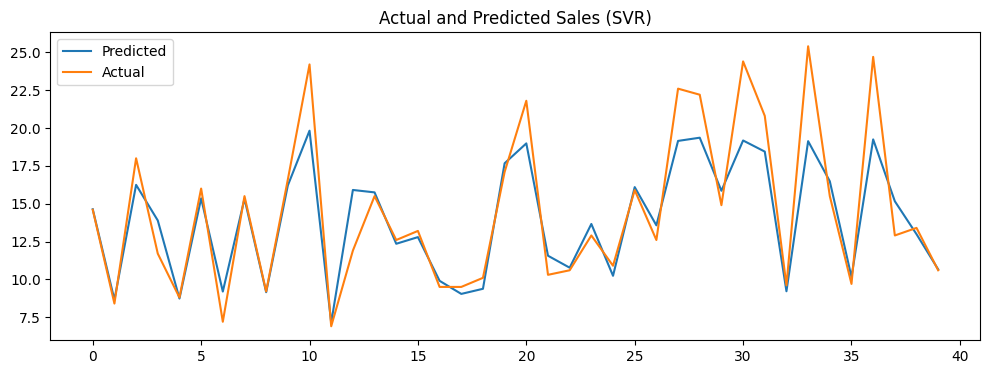

In [464]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales (SVR)', fontsize=12)

In [465]:
score

,LR,DTR,RFR,SVR
MAE,1.177153,0.912500,0.621950,1.429315
MSE,2.432077,1.268750,0.586798,4.756472
RMSE,1.559512,1.126388,0.766027,2.180934
R2,0.909895,0.952994,0.978260,0.823779


### Conclusion

* In this task, I have used the Advertising Dataset to predict sales based on TV, Radio, and Newspaper advertising budgets.

* I performed an analysis and visualization of the dataset to understand the relationships between features and identify outliers.
* I trained several models: Linear Regression, Decision Tree Regressor, Random Forest Regressor, and Support Vector Regressor (SVR).
* The Random Forest Regressor achieved the best performance with an R-squared value of 0.978260, indicating very high accuracy.

* I created a dataframe of actual and predicted values for each model to demonstrate their effectiveness.
* Finally, I visualized the actual and predicted sales values, showing a close match for the best-performing models and confirming their reliability.